In [26]:
import torch
import torch.nn as nn
from torch_geometric.datasets import KarateClub
from torch_geometric.loader import NeighborSampler
import networkx as nx
from torch_geometric.utils import to_networkx

In [19]:
data = KarateClub()[0]
data

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])

In [95]:
sampler = NeighborSampler(data.edge_index, sizes=[1, 1])

In [ ]:
res = sampler.sample(batch=torch.arange(data.num_nodes))[2]

edges = torch.cat([torch.unsqueeze(res[0].edge_index[0], -1), torch.unsqueeze(res[1].edge_index[0], -1)], dim=-1)
# drop self loops using torch geometric
edges = edges[edges[:, 0] != edges[:, 1]]
edges = edges.tolist()
print(edges)

[[10, 7], [17, 2], [27, 7], [2, 7], [0, 6], [10, 6], [0, 0], [0, 2], [32, 0], [2, 2], [0, 4], [0, 0], [0, 0], [2, 3], [32, 32], [32, 32], [5, 5], [0, 0], [32, 32], [0, 0], [32, 32], [0, 0], [32, 32], [32, 29], [25, 25], [24, 24], [29, 29], [2, 2], [2, 31], [32, 32], [32, 8], [0, 24], [31, 31], [19, 28]]


In [ ]:
# plotting 
# get graph from data
G = to_networkx(data, to_undirected=True)
pos = nx.spring_layout(G, seed=42)
G_new = nx.Graph(edges)

Graph with 21 nodes and 21 edges


/Users/aa-aanegola/miniconda3/envs/graph/lib/python3.9/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


Text(0.5, 1.0, 'Sampled Graph')

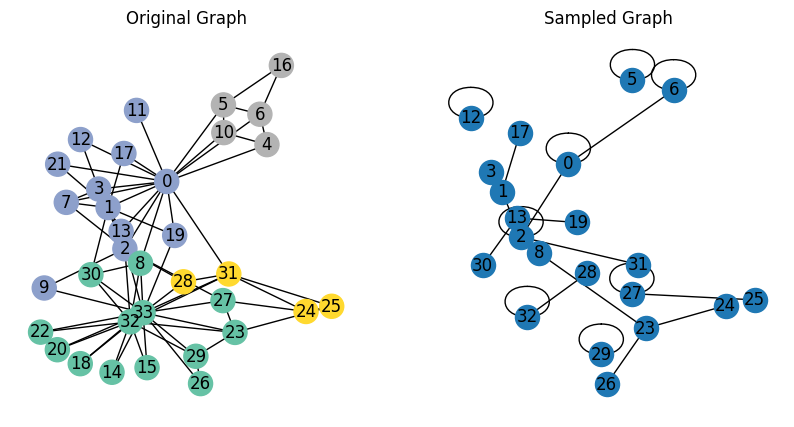

In [106]:
# plot G and Gnew
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(121)
nx.draw(G, pos, with_labels=True, node_color=data.y, cmap="Set2")
plt.title('Original Graph')
plt.subplot(122)
pos_new = nx.spring_layout(G_new, seed=42)
nx.draw(G_new, pos, with_labels=True, cmap="Set2")
plt.title('Sampled Graph')